In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import json

In [17]:
with open('xcode/Debug/log.txt','r') as f:
    data=[json.loads(a.strip()) for a in f]
df=pd.DataFrame(data)

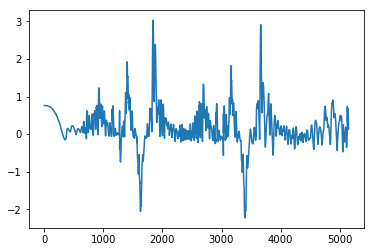

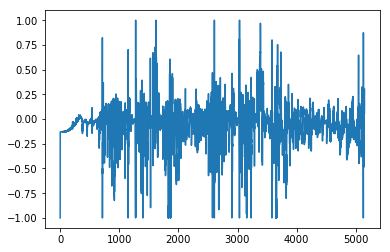

In [18]:
plt.plot(df.cte)
plt.show()

plt.plot(df.steering_angle)
plt.show()



In [63]:
import os
from time import sleep
from glob import glob
import json 
import pandas as pd

def run(p,i,d,trotle,iterations):
    os.system('rm *log*')
    os.system('osascript run_simulator.scpt')
    sleep(3)
    os.system('xcode/Debug/pid %f %f %f %f %d' % (p,i,d,trotle,iterations))
    sleep(3)
    os.system('osascript stop.scpt')
    sleep(3)
    gl=glob('log*')
    log=gl[0]
    with open(log,'r') as f:
        data=[json.loads(a.strip()) for a in f]
    df=pd.DataFrame(data)
    return df


In [71]:
def run_robot(p, speed):
    df=run(p[0],p[1],p[2],speed,3000)
    rmse=df.cte.apply(lambda x:x*x).mean()**(1/2)
    print ('Run p=',p,' result:', rmse)
    #return rmse
    return rmse

In [74]:
def twiddle(p, speed, tol=20, max_iter=100): 
    results=[]
    #p = [0.13,0.0001,4]
    dp=[a/10 for a in p]
    err = run_robot(p,speed)
    results.append([p,0,err])
    best_err=err
    it = 0
    #working with error , not sum(dp)
    while err > tol and it<max_iter:
        print("Iteration {}, best error = {}".format(it, best_err))
        for i in range(len(p)):
            p[i] += dp[i]
            err = run_robot(p,speed)
            results.append([p,it,err])

            if err < best_err:
                best_err = err
                dp[i] *= 1.1
            else:
                p[i] -= 2 * dp[i]
                err = run_robot(p,speed)
                results.append([p,it,err])

                if err < best_err:
                    best_err = err
                    dp[i] *= 1.1
                else:
                    p[i] += dp[i]
                    dp[i] *= 0.9
        it += 1
    return p, best_err, results

In [70]:
p = [0.13,0.0001,4]

res=[]

for speed in [1.0*a/10 for a in range(3,11)]:
    best, best_err, results =twiddle(p, speed=speed, tol=0.1, max_iter=25)
    print (datetime.datetime.now(),' For speed=', speed, ' best result', best_err, 'p=', best)
    p=best
    results.append([speed,best,best_err, results])

Run p= [0.13, 0.0001, 4]  result: 0.6587385064530543
Iteration 0, best error = 0.6587385064530543
Run p= [0.14300000000000002, 0.0001, 4]  result: 0.6070214585696292
Run p= [0.14300000000000002, 0.00011, 4]  result: 0.6073504852389598
Run p= [0.14300000000000002, 9e-05, 4]  result: 0.6093829532322015
Run p= [0.14300000000000002, 0.0001, 4.4]  result: 0.6086432573486703
Run p= [0.14300000000000002, 0.0001, 3.6000000000000005]  result: 0.6191423295511297
Iteration 1, best error = 0.6070214585696292
Run p= [0.15730000000000002, 0.0001, 4.000000000000001]  result: 0.5672403952523133
Run p= [0.15730000000000002, 0.000109, 4.000000000000001]  result: 0.5706459724575305
Run p= [0.15730000000000002, 9.1e-05, 4.000000000000001]  result: 0.559904266309876
Run p= [0.15730000000000002, 9.1e-05, 4.360000000000001]  result: 0.5627515101996609
Run p= [0.15730000000000002, 9.1e-05, 3.640000000000001]  result: 0.575509574401677
Iteration 2, best error = 0.559904266309876
Run p= [0.17303000000000002, 9.

KeyboardInterrupt: 

In [75]:
best_f, best_err_f, results_f =twiddle([0.32, 0.0000001, 150], speed=1, tol=0.1, max_iter=10)
    

Run p= [0.32, 1e-07, 150]  result: 22.193502950290274
Iteration 0, best error = 22.193502950290274
Run p= [0.352, 1e-07, 150]  result: 2.8631562837796087
Run p= [0.352, 1.0999999999999999e-07, 150]  result: 7.00994604373336
Run p= [0.352, 8.999999999999999e-08, 150]  result: 4.414079789997333
Run p= [0.352, 9.999999999999998e-08, 165.0]  result: 5.147980955837607
Run p= [0.352, 9.999999999999998e-08, 135.0]  result: 9.348897504845242
Iteration 1, best error = 2.8631562837796087
Run p= [0.3872, 9.999999999999998e-08, 150.0]  result: 22.073672935252297
Run p= [0.31679999999999997, 9.999999999999998e-08, 150.0]  result: 5.931348530453822
Run p= [0.352, 1.0899999999999998e-07, 150.0]  result: 13.064301719572423
Run p= [0.352, 9.099999999999998e-08, 150.0]  result: 14.698282665109236
Run p= [0.352, 9.999999999999998e-08, 163.5]  result: 4.0785260363445
Run p= [0.352, 9.999999999999998e-08, 136.5]  result: 2.2908029637960303
Iteration 2, best error = 2.2908029637960303
Run p= [0.383679999999

In [89]:
#let's make 2 runs for different d
z=run(0.3224544990939262, 0.00013517627894290305,7.069833065826603,0.3,10000)
z2=run(0.3224544990939262, 0.00013517627894290305,7.069833065826603*2,0.3,10000)
z3=run(0.3224544990939262, 0.00013517627894290305,7.069833065826603*5,0.3,10000)

In [100]:
print ('RMSE fof d=7 and d=14',z.cte.map(lambda x:x**x).mean(),z2.cte.map(lambda x:x**x).mean())
print ('Mean abs(cte) fof d=7 and d=14',z.cte.map(lambda x:abs(x)).mean(),z2.cte.map(lambda x:abs(x)).mean())

RMSE fof d=7 and d=14 (0.853362376403-0.285904800839j) (0.936963993279-0.215352666542j)
Mean abs(cte) fof d=7 and d=14 0.23684116000000216 0.20166754999999947


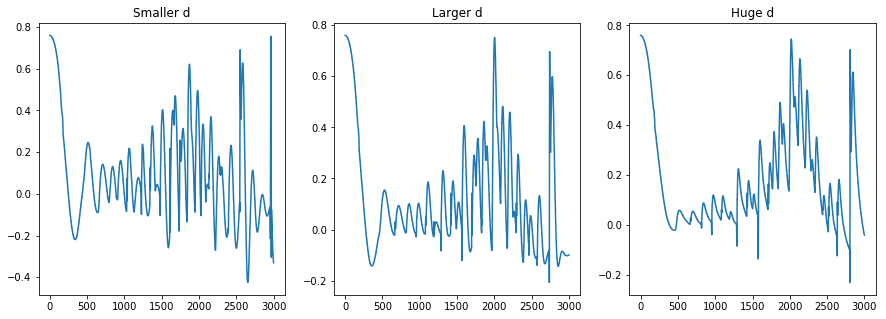

In [117]:
f,ax = plt.subplots(1,3)
f.set_figwidth(15)
f.set_figheight(5)
ax[0].plot(z.cte.values[:3000])
ax[1].plot(z2.cte.values[:3000])
ax[2].plot(z3.cte.values[:3000])
ax[0].set_title('Smaller d')
ax[1].set_title('Larger d')
ax[2].set_title('Huge d')
plt.savefig('d.png')
plt.show()

In [113]:
#let's make 2 runs for different d
q1=run(0.3224544990939262, 0.00013517627894290305,7.069833065826603,0.3,10000)
q2=run(0.3224544990939262*1.1, 0.00013517627894290305,7.069833065826603,0.3,10000)
q3=run(0.3224544990939262*1.3, 0.00013517627894290305,7.069833065826603,0.3,10000)

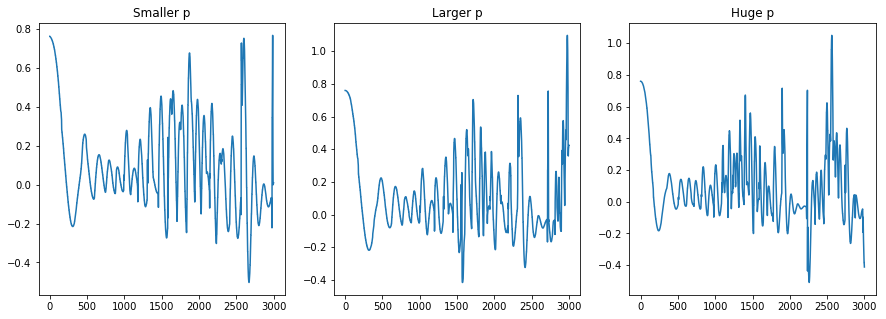

In [116]:
f,ax = plt.subplots(1,3)
f.set_figwidth(15)
f.set_figheight(5)
ax[0].plot(q1.cte.values[:3000])
ax[1].plot(q2.cte.values[:3000])
ax[2].plot(q3.cte.values[:3000])
ax[0].set_title('Smaller p')
ax[1].set_title('Larger p')
ax[2].set_title('Huge p')
plt.savefig('p.png')
plt.show()

In [119]:
results

[[[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  0,
  0.6100127585731311],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  0,
  0.5598118193768336],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  0,
  0.5767929889119671],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  0,
  0.5844649359166041],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  0,
  0.5689082020449343],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  0,
  0.5814267801503475],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  1,
  0.5637022156280742],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  1,
  0.6252579959104881],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  1,
  0.5832883314382357],
 [[0.1807616905129664, 0.00013121419981666912, 4.387542555999993],
  1,
  0.5766712601907601],
 [[0.1807616905129664, 0.00013121419981666912, 4.3